In [1]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature as ft
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [2]:
def CreatData():
 
    x=[]
    y=[]
    for i in range(1,6):
        batch_path='/Users/swagyangjh/Desktop/604/finalProejct/final/data/cifar-10-batches-py/data_batch_%d'%(i)
        batch_dict=unpickle(batch_path)
        train_batch=batch_dict[b'data'].astype('float')
        train_labels=np.array(batch_dict[b'labels'])
        x.append(train_batch)
        y.append(train_labels)

    traindata=np.concatenate(x)
    trainlabels=np.concatenate(y)
    

    testpath=os.path.join('cifar-10-batches-py','test_batch')
    test_dict=unpickle(testpath)
    testdata=test_dict[b'data'].astype('float')
    testlabels=np.array(test_dict[b'labels'])
    
    return traindata,trainlabels,testdata,testlabels

In [3]:
def KNN(traindata,trainlabels,testdata,k=3):
 
    num_train=traindata.shape[0]
    num_test=testdata.shape[0]
    dist=np.zeros((num_test,num_train))
    for i in range(num_test):
        dist[i]=np.reshape(np.sqrt(np.sum(np.square(testdata[i]-traindata),axis=1)),[1,num_train])
   
    predictlabels=np.zeros((num_test,1))
    for i in range(num_test):
        close_k=trainlabels[np.argsort(dist[i])[:k]]
        predictlabels[i]=np.argmax(np.bincount(close_k))

    return predictlabels

In [4]:

import numpy as np
import os
import time
import matplotlib.pyplot as plt




def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def CreatData():
   
    x=[]
    y=[]
    for i in range(1,6):
        batch_path='/Users/swagyangjh/Desktop/604/finalProejct/final/data/cifar-10-batches-py/data_batch_%d'%(i)
        batch_dict=unpickle(batch_path)
        train_batch=batch_dict[b'data'].astype('float')
        train_labels=np.array(batch_dict[b'labels'])
        x.append(train_batch)
        y.append(train_labels)
   
    traindata=np.concatenate(x)
    trainlabels=np.concatenate(y)
    

    testpath=os.path.join('/Users/swagyangjh/Desktop/604/finalProejct/final/data/cifar-10-batches-py/test_batch')
    test_dict=unpickle(testpath)
    testdata=test_dict[b'data'].astype('float')
    testlabels=np.array(test_dict[b'labels'])
    
    return traindata,trainlabels,testdata,testlabels



In [5]:

start_time=time.process_time()
traindata,trainlabels,testdata,testlabels=CreatData()
print('traindata:',traindata.shape)
print('trainlabels:',trainlabels.shape)
print('testdata:',testdata.shape)
print('testlabels:',testlabels.shape)



traindata: (50000, 3072)
trainlabels: (50000,)
testdata: (10000, 3072)
testlabels: (10000,)


In [6]:
num_train=10000
num_test=5000

traindata=traindata1[:num_train]
trainlabels=trainlabels1[:num_train]
testdata=testdata1[:num_test]
testlabels=testlabels1[:num_test]

num_test=testdata.shape[0]



NameError: name 'traindata1' is not defined

In [85]:

k_choice=[5,10,15,20,40,100]
#k_choice=[10]
k_accuracy=[]
for k_c in tqdm(k_choice):

    neigh = KNeighborsClassifier(n_neighbors=k_c)
    neigh.fit(traindata, trainlabels)    
    pre = neigh.predict(testdata)
    accuracy = accuracy_score(testlabels,pre)
    accuracy = accuracy*100
    k_accuracy.append(accuracy)
    print('k=%d:accuracy=%.2f%%'%(k_c,accuracy))





 17%|█▋        | 1/6 [00:03<00:18,  3.61s/it]

k=5:accuracy=28.70%


 33%|███▎      | 2/6 [00:07<00:14,  3.59s/it]

k=10:accuracy=29.66%


 50%|█████     | 3/6 [00:10<00:10,  3.58s/it]

k=15:accuracy=28.88%


 67%|██████▋   | 4/6 [00:14<00:07,  3.66s/it]

k=20:accuracy=29.70%


 83%|████████▎ | 5/6 [00:18<00:03,  3.65s/it]

k=40:accuracy=28.74%


100%|██████████| 6/6 [00:21<00:00,  3.64s/it]

k=100:accuracy=27.54%


In [86]:
k_accuracy

[28.7, 29.659999999999997, 28.88, 29.7, 28.74, 27.54]

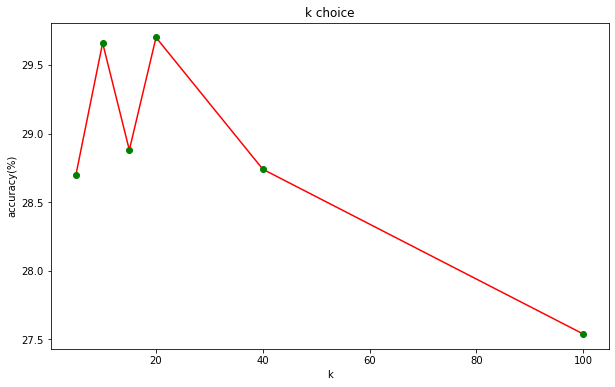

In [87]:
#将结果可视化
plt.figure(figsize=(10,6))
plt.plot(k_choice,k_accuracy,'r-')
plt.plot(k_choice,k_accuracy,'go')
plt.xlabel('k')
plt.ylabel('accuracy(%)')
plt.title('k choice')
plt.show()


In [88]:

max_id=np.argmax(k_accuracy)
max_acc=k_accuracy[max_id]
max_acc_k=k_choice[max_id]

print('\n\nmax_acc=%.2f%%,max_acc_k=%d'%(max_acc,max_acc_k))

end_time=time.process_time()

print('\n\nexecution time：%ss'%(str(end_time-start_time)))




max_acc=29.70%,max_acc_k=20


运行时间：123.94975199999999s


# The RGB pixel values of the dataset are extracted and the features are obtained by PCA transform and classified by KNN. Different principal component scores and different K values are set in the experiments.

In [7]:
start=time.process_time()

In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [9]:
traindata1,trainlabels1,testdata1,testlabels1=CreatData()

num_train=10000
num_test=5000

traindata=traindata1[:num_train]
trainlabels=trainlabels1[:num_train]
testdata=testdata1[:num_test]
testlabels=testlabels1[:num_test]


In [10]:
#PCA
pca=PCA(n_components=307,copy=True)
num_pca=pca.n_components
pca_traindata=pca.fit_transform(traindata)
print(num_pca)
print(pca_traindata.shape)

307
(10000, 307)


In [11]:
#记录最高精度max_acc,以及对应的HOG尺寸max_acc_cellsize和K值max_acc_K
max_acc=0
max_acc_n_components=0
max_acc_k=0

In [117]:
k_choice=[5,10,15,20,40,100]
#k_choice=[10] 

for k_c in k_choice:
    print('\n\nk=',k_c)
   
    num_components=[100,700,1000,2000,3000,3072]

    size_accuracy=[]
    
    for num_c in num_components:

        pca=PCA(n_components=num_c,copy=True)
        pca_traindata=pca.fit_transform(traindata)
       
        pca_testdata=pca.fit_transform(testdata)
    
        
        predictlabels=KNN(pca_traindata,trainlabels,pca_testdata,k=k_c)
        testlabels=np.reshape(testlabels,[num_test,1])

        num_right=np.sum((predictlabels==testlabels).astype('float'))
        accuracy=(num_right/num_test)*100
        print('n_components=%d:accuracy=%.2f%%'%(num_c,accuracy))
        
        size_accuracy.append(accuracy)
    
    max_id=np.argmax(size_accuracy)
    if size_accuracy[max_id]>max_acc:
        max_acc=size_accuracy[max_id]
        max_acc_n_components=num_components[max_id]
        max_acc_k=k_c



k= 5
n_components=100:accuracy=13.04%
n_components=700:accuracy=11.98%
n_components=1000:accuracy=11.78%
n_components=2000:accuracy=11.74%
n_components=3000:accuracy=11.76%
n_components=3072:accuracy=11.76%


k= 10
n_components=100:accuracy=13.22%
n_components=700:accuracy=12.08%
n_components=1000:accuracy=11.98%
n_components=2000:accuracy=12.00%
n_components=3000:accuracy=12.04%
n_components=3072:accuracy=12.04%


k= 15
n_components=100:accuracy=13.54%
n_components=700:accuracy=12.84%
n_components=1000:accuracy=12.80%
n_components=2000:accuracy=12.66%
n_components=3000:accuracy=12.64%
n_components=3072:accuracy=12.64%


k= 20
n_components=100:accuracy=13.40%
n_components=700:accuracy=13.02%
n_components=1000:accuracy=13.08%
n_components=2000:accuracy=12.78%
n_components=3000:accuracy=12.74%
n_components=3072:accuracy=12.74%


k= 40
n_components=100:accuracy=13.00%
n_components=700:accuracy=12.16%
n_components=1000:accuracy=11.86%
n_components=2000:accuracy=12.08%
n_components=3000:a

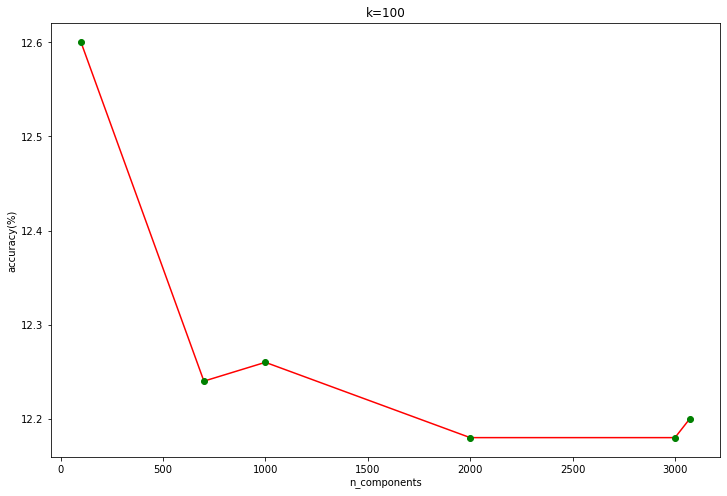

In [118]:

plt.figure(figsize=(12,8))
plt.plot(num_components,size_accuracy,'r-')
plt.plot(num_components,size_accuracy,'go')
plt.xlabel('n_components')
plt.ylabel('accuracy(%)')
plt.title('k=%d'%(k_c))
plt.show()

In [12]:

traindata1,trainlabels1,testdata1,testlabels1=CreatData()

num_train=10000
num_test=5000

traindata=np.reshape(traindata1[:num_train],[num_train,3,32,32])
trainlabels=trainlabels1[:num_train]
testdata=np.reshape(testdata1[:num_test],[num_test,3,32,32])
testlabels=testlabels1[:num_test]

In [24]:
def hog_extraction(data,size):
    num=data.shape[0]
    #Extraction of HOG features from training samples
    data1_hogfeature=[]
    for i in range(num):
        x=data[i]
        r=Image.fromarray(x[0])
        g=Image.fromarray(x[1])
        b=Image.fromarray(x[2])
        
        #merge RGB channel
        img=Image.merge("RGB",(r,g,b))
        #transform to grey image
        gray=img.convert('L')
        out=gray.resize((100,100),Image.ANTIALIAS)
        #transform to array
        gray_array=np.array(gray)
        
        #HOG feature
        hogfeature=ft.hog(gray_array,pixels_per_cell=(size,size))

        data1_hogfeature.append(hogfeature)

    #Stacking the features in data1_hogfeature by row
    data_hogfeature=np.reshape(np.concatenate(data1_hogfeature),[num,-1])
    return data_hogfeature

# HOG

In [8]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature as ft

start=time.process_time()



def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#创建训练样本和测试样本
def CreatData():
    #create data
    #merge each batch to X and Y
    x=[]
    y=[]
    for i in range(1,6):
        batch_path='/Users/swagyangjh/Desktop/604/finalProejct/final/data/cifar-10-batches-py/data_batch_%d'%(i)
        batch_dict=unpickle(batch_path)
        train_batch=batch_dict[b'data']
        train_labels=np.array(batch_dict[b'labels'])
        x.append(train_batch)
        y.append(train_labels)
    #five batches are 50000x3072，label is 50000x1
   
    traindata=np.concatenate(x)
    trainlabels=np.concatenate(y)
   
    testpath=os.path.join('/Users/swagyangjh/Desktop/604/finalProejct/final/data/cifar-10-batches-py/test_batch')
    test_dict=unpickle(testpath)
    testdata=test_dict[b'data']
    testlabels=np.array(test_dict[b'labels'])
    
    return traindata,trainlabels,testdata,testlabels

#train and test
traindata1,trainlabels1,testdata1,testlabels1=CreatData()

num_train=10000
num_test=5000

traindata=np.reshape(traindata1[:num_train],[num_train,3,32,32])
trainlabels=trainlabels1[:num_train]
testdata=np.reshape(testdata1[:num_test],[num_test,3,32,32])
testlabels=testlabels1[:num_test]

#HOG feature function，input data is [num,3,32,32] format,size is cell；return data_hogfeature [num,dim]
def hog_extraction(data,size):
    num=data.shape[0]
    #hog feature
    data1_hogfeature=[]
    for i in range(num):
        x=data[i]
        r=Image.fromarray(x[0])
        g=Image.fromarray(x[1])
        b=Image.fromarray(x[2])
        
        #merge three channel
        img=Image.merge("RGB",(r,g,b))
        #turn it into grey
        gray=img.convert('L')
#        out=gray.resize((100,100),Image.ANTIALIAS)
        # transform to array
        gray_array=np.array(gray)
        
        
        hogfeature=ft.hog(gray_array,pixels_per_cell=(size,size))

        data1_hogfeature.append(hogfeature)

  
    data_hogfeature=np.reshape(np.concatenate(data1_hogfeature),[num,-1])
    return data_hogfeature


max_acc=0
max_acc_cellsize=0
max_acc_k=0

#k
k_choice=[5,10,15,20]
#k_choice=[15]
for k_c in k_choice:
    print('\n\nk=',k_c)
    #HOG cellsize
    cellsize=[4,6,8,9,10]
#    cellsize=[10]
    size_accuracy=[]
    for size in cellsize:
        #hog feature
        train_hogfeature=hog_extraction(traindata,size)
        #test hog feature
        test_hogfeature=hog_extraction(testdata,size)
        num_hogfeature=test_hogfeature.shape[1]
    
        #
        predictlabels=KNN(train_hogfeature,trainlabels,test_hogfeature,k=k_c)
        
        testlabels=np.reshape(testlabels,[num_test,1])
        #
        num_right=np.sum((predictlabels==testlabels).astype('float'))
        accuracy=(num_right/num_test)*100
        print('cellsize=(%d,%d),num_hogfeature=%d:accuracy=%.2f%%'%(size,size,num_hogfeature,accuracy))
        
        size_accuracy.append(accuracy)
    
    max_id=np.argmax(size_accuracy)
    if size_accuracy[max_id]>max_acc:
        max_acc=size_accuracy[max_id]
        max_acc_cellsize=cellsize[max_id]
        max_acc_k=k_c
    
   
    plt.figure(figsize=(12,8))
    plt.plot(cellsize,size_accuracy,'r-')
    plt.plot(cellsize,size_accuracy,'go')
    plt.xlabel('cellsize')
    plt.ylabel('accuracy(%)')
    plt.title('k=%d'%(k_c))
    plt.show()

print('\n\nThe result:max_acc=%.2f%%,max_acc_cellsize=(%d,%d),max_acc_k=%d'%(max_acc,max_acc_cellsize,max_acc_cellsize,max_acc_k))

end=time.process_time()

print('time：%ss'%(str(end-start)))



k= 5


KeyboardInterrupt: 